**注：**

学习**《Python科学计算》 2nd 张若愚** 笔记

本书里面还有很多详细的用法和讲解，但是有两点需要注意：
1. 书籍本身是基于`Pyhton2.7`进行讲解实验的，所以里面有些例子在`Python3`下面有所出入；
2. 太过于细致了，导致学起来有些焦虑，这是要看个人，如果只是当做工具来使用的话，在了解大致后，用什么学什么，不能舍本逐末买椟还珠。

# ndarray对象-数组的创建和存取

In [7]:
%matplotlib inline
import numpy as np

from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

## 使用array()创建数组

下面介绍的数组创建的方法都是先创建`序列`，在使用`array()`函数转化为数组

### 一维数组

In [8]:
a = np.array( [1, 2, 3, 4] )  # 方法一，使用列表
b = np.array( (1, 2, 3, 4) )  # 方法二，只用元组

### 二维数组

In [9]:
c = np.array( [ [1, 2, 3, 4], 
                [5, 6, 7, 8], 
                [9, 10, 11, 12] ] )  # 每一行用中括号括起来

## shape属性
### 获取数组大小

In [10]:
a.shape  # 一个数字表示1维数组

(4,)

In [11]:
c.shape  # 两个数字表示二维数组，第0轴长度为3，第1轴长度为4

(3, 4)

### shape属性修改

In [12]:
c

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [13]:
c.shape = 4,3  # 将数组改为4行3列
c              # 注意不是对数组转置，只是改变每个轴的大小，数组元素在内存中的位置并没有改变

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [14]:
c.shape = 2, -1   # 第二个参数设置为-1系统会自动计算第二个参数
print(c.shape)
c

(2, 6)


array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

##  reshape()方法

使用reshape()返回一个改变了尺寸的新数组，原数组的shape保持不变

In [15]:
d = a.reshape(2,2)
d

array([[1, 2],
       [3, 4]])

In [16]:
a

array([1, 2, 3, 4])

In [17]:
a[0] = 100  # a和d共享同一块内存，修改a[0]也会改变d[0, 0]
d

array([[100,   2],
       [  3,   4]])

In [18]:
d[1,0] = 60  # 修改d中第2行，第1列元素，a[2]也会修改(a的第3个元素)
a

array([100,   2,  60,   4])

## dtype属性创建浮点数组，复数数组

In [19]:
# 默认dtype=int32，即默认创建数组元素是整数，并且32位长整型
np.array( [ [1, 2, 3, 4], 
            [5, 6, 7, 8], 
           [9, 10, 11, 12]], dtype = np.float) 

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

In [20]:
# 创建复数数组
np.array( [ [1, 2, 3, 4], 
            [5, 6, 7, 8], 
           [9, 10, 11, 12]], dtype = np.complex) 

array([[ 1.+0.j,  2.+0.j,  3.+0.j,  4.+0.j],
       [ 5.+0.j,  6.+0.j,  7.+0.j,  8.+0.j],
       [ 9.+0.j, 10.+0.j, 11.+0.j, 12.+0.j]])

## 使用专门的函数创建数组

以上**1.1节**介绍的数组创建的方法都是先创建`序列`，在使用`array()`函数转化为数组

### arange(开始值, 终值, 步长)

类似`Python`的`range()`，注意**不包括终值**.

In [21]:
np.arange(0, 1, 0.1)  # 不包括终值！！！

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [22]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### linspace(开始值, 终值, 元素个数)

默认**包括终值**，可以使用`endpoint`设置**是否包括终值**

In [23]:
np.linspace(0, 1, 5) # 0~1之间，5个元素

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [24]:
np.linspace(0, 1, 5, endpoint=False) # 0~1之间，5个元素 不包含终值

array([0. , 0.2, 0.4, 0.6, 0.8])

### logspace(开始值, 终值, 元素个数)
创建等比数列，下面的例子产生`1(10^0)`到`100(10^2)`、有`10`个元素的等比数列:

In [25]:
np.logspace(0, 2, 10)

array([  1.        ,   1.66810054,   2.7825594 ,   4.64158883,
         7.74263683,  12.91549665,  21.5443469 ,  35.93813664,
        59.94842503, 100.        ])

### fromstring(字符串, dtype=?)

从字节创建数组

In [26]:
s = 'abcd'
np.fromstring( s, dtype=np.int8)  # 字符对应的ASCII码

e:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


array([ 97,  98,  99, 100], dtype=int8)

### fromfunction( 函数, 数组大小)

**fromfunction**( `计算每个数组元素的函数`, `数组大小即shape` )

In [27]:
def f1(i):
    return i%4+1

np.fromfunction( f1, (5,) )  #   第二个参数必须是一个序列，本例中用(5,)创建一个5元素的一维数组

array([1., 2., 3., 4., 1.])

创建一个 `二维数组` 表示 **九九乘法表**

In [28]:
def f2(i, j):
    return (i+1) * (j+1)

np.fromfunction( f2, (9, 9))

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 4.,  8., 12., 16., 20., 24., 28., 32., 36.],
       [ 5., 10., 15., 20., 25., 30., 35., 40., 45.],
       [ 6., 12., 18., 24., 30., 36., 42., 48., 54.],
       [ 7., 14., 21., 28., 35., 42., 49., 56., 63.],
       [ 8., 16., 24., 32., 40., 48., 56., 64., 72.],
       [ 9., 18., 27., 36., 45., 54., 63., 72., 81.]])

# 存取元素

## 数组的存取方法与Python的标准方法相同

In [29]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
a[5]  # 用整数作为下标可以获取数组中的某个元素
      # 下标从0开始

5

In [31]:
a[3:5]  # 用范围作为下标获取数组的一个切片，包括a[3]不包括a[5]

array([3, 4])

In [32]:
 a[:-1]  # 下标可以使用负数，表示从数组后往前数

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [33]:
 a[:-2]  # 下标可以使用负数，表示从数组后往前数

array([0, 1, 2, 3, 4, 5, 6, 7])

In [34]:
a[2:4] = 100,101    # 下标还可以用来修改元素的值
a

array([  0,   1, 100, 101,   4,   5,   6,   7,   8,   9])

In [35]:
a[1:-1:2] # 范围中的第三个参数表示步长，2表示隔一个元素取一个元素

array([  1, 101,   5,   7])

In [36]:
a = np.arange(10)  # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a[: : -1]          # 省略范围的开始下标和结束下标，步长为-1，整个数组头尾颠倒

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [37]:
a[9:2:-2]     # 步长为负数时，开始下标必须大于结束下标
              # 从a[9] 每隔2个取一个元素，直到a[2]结束

array([9, 7, 5, 3])

In [38]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 和Python的列表序列不同点

通过下标范围获取的新的数组是原始数组的一个**视图**。它与原始数组**共享同一块数据空间**，即**修改了获得的新数组，旧的也会变化！**

In [39]:
print('修改前')
print('a : ',a)
b = a[3:7]
print('b : ',b)

print('修改b[2]后')
b[2] = 2223
print('a : ',a)
print('b : ',b)

修改前
a :  [0 1 2 3 4 5 6 7 8 9]
b :  [3 4 5 6]
修改b[2]后
a :  [   0    1    2    3    4 2223    6    7    8    9]
b :  [   3    4 2223    6]


## 使用整数序列存取

除了使用下标范围存取元素之外，`NumPy`还提供了两种存取元素的高级方法

当使用整数序列对数组元素进行存取时，将使用**整数序列中的每个元素作为下标**，整数序列可以是列表(如第4行)或者数组(如第6行)。

**使用整数序列作为下标获得的数组** 不和 **原始数组** `共享数据空间！`

In [40]:
x = np.arange(10)
print('x : ', x)
y = x[[1, 3, 5, 1]] # 获取x中的下标为1, 3, 5, 1的4个元素，组成一个新的数组
print('y : ', y)

print('\n修改y[0]后，不影响原始数组x')
y[0] = 999
print('x : ', x)
print('y : ', y)


print('\n用整数序列下标 来修改元素的值')
x[[1,3,5]] = -99, -88, -77 
print('x : ', x)

x :  [0 1 2 3 4 5 6 7 8 9]
y :  [1 3 5 1]

修改y[0]后，不影响原始数组x
x :  [0 1 2 3 4 5 6 7 8 9]
y :  [999   3   5   1]

用整数序列下标 来修改元素的值
x :  [  0 -99   2 -88   4 -77   6   7   8   9]


## 使用布尔[数组/列表]筛选数据

当使用`布尔数组b`作为下标存取`数组x`中的元素时，将收集 `数组x` 中所有在 `数组b` 中对应下标为`True`的元素。

**使用布尔数组作为下标获得的数组** 不和 **原始数组** 共享数据空间

**注意：**
这种方式只对应于 **布尔数组**，不能使用 **布尔列表**。

In [41]:
x = np.arange(1,6)
list_b = [True, False, True, False, True]  # bool列表
array_b = np.array( list_b )    # bool数组


布尔数组`array_b` 中为`True`的下标对应`x` 中的元素取出来，组成一个新的数组，且与`x` 不共享数据空间

有些资料区分了 **布尔数组** 和 **布尔列表**，说：

> 使用 **布尔列表** 不能筛选数据，会把列表中的`True`当作`1`, `False`当作`0`，按照 **整数序列方式** 获取`x`中的元素。

但我在实际测试中，发现**没有区别**，对比下面的例子可以得到结论，估计是`numpy`版本的问题。

为了安全起见，想用筛选功能，还是用 **布尔数组** 靠谱。

In [42]:
print('x       : ', x)
print('array_b : ', array_b, type(array_b))
print('list_b  : ', list_b, type(list_b))
y_ar = x[array_b]
y_li = x[list_b]
print('y_ar    : ', y_ar)
print('y_li    : ', y_li)

print('\n修改 y_ar[0] 和 y_li[1]后，不影响原始数组x')
y_ar[0] = 999
y_li[1] = 777
print('x    : ', x)
print('y_ar : ', y_ar)
print('y_li : ', y_li)

x       :  [1 2 3 4 5]
array_b :  [ True False  True False  True] <class 'numpy.ndarray'>
list_b  :  [True, False, True, False, True] <class 'list'>
y_ar    :  [1 3 5]
y_li    :  [1 3 5]

修改 y_ar[0] 和 y_li[1]后，不影响原始数组x
x    :  [1 2 3 4 5]
y_ar :  [999   3   5]
y_li :  [  1 777   5]


### 提示

**布尔数组** 一般不是手工产生，而是使用 **布尔运算** 的`ufunc函数`产生，关于`ufunc函数`后续会讲到

In [43]:
x = np.random.rand(5)  # 产生一个长度为5，元素值为0-1的随机数的数组
print('x : ', type(x), x)
y = x>0.5              # 数组x中的每个元素和0.5进行大小比较，得到一个布尔数组，True表示x中对应的值大于0.5
print('y : ', type(y), y)
z = x[x>0.5]           # 使用x>0.5返回的布尔数组收集x中的元素，因此得到的结果是x中所有大于0.5的元素的数组
print('z : ', type(z), z)

x :  <class 'numpy.ndarray'> [0.84865491 0.6538414  0.38508033 0.45073805 0.74620768]
y :  <class 'numpy.ndarray'> [ True  True False False  True]
z :  <class 'numpy.ndarray'> [0.84865491 0.6538414  0.74620768]


# 多维数组的存取

多维数组的存取和一维数组类似，因为多维数组有多个轴，因此它的下标需要用多个值来表示，`NumPy` 采用`组元(tuple)` 作为数组的下标。
如二维数组需要`(x, y)`的元组标记一个数组元素；三维数组需要`(x, y, z)`的元组标记一个元素。

如下图所示，`a` 为一个`6x6`的二维数组，图中用颜色区分了各个下标以及其对应的选择区域。

![a数组](.\img\IMG20200109165028.png)

## 取数据

In [44]:
a = np.array([ [ 0,  1,  2,  3,  4,  5],
               [10, 11, 12, 13, 14, 15],
               [20, 21, 22, 23, 24, 25],
               [30, 31, 32, 33, 34, 35],
               [40, 41, 42, 43, 44, 45],
               [50, 51, 52, 53, 54, 55] ])

orange_a = a[0, 3:5]    # 第1行，橘黄色
red_a    = a[:, 2]      # 第3列，红色
blue_a   = a[4:, 4:]    # 蓝色
green_a  = a[2::2, ::2] # 绿色
print('橘黄色部分 : ', orange_a)
print('红色部分   : ', red_a)
print('蓝色部分   : \n', blue_a)
print('绿色部分   : \n', green_a)

橘黄色部分 :  [3 4]
红色部分   :  [ 2 12 22 32 42 52]
蓝色部分   : 
 [[44 45]
 [54 55]]
绿色部分   : 
 [[20 22 24]
 [40 42 44]]


## 创建数据

如何创建这个`6×6`的二维数组？

数组`a`实际上是一个 **加法表** : 

 - 纵轴的值为 `0, 10, 20, 30, 40, 50`；
 - 横轴的值为 `0, 1, 2, 3, 4, 5`；
 
 纵轴的每个元素都和横轴的每个元素求和，就得到图中所示的数组 `a`。
 
 你可以用下面的语句创建它：

In [45]:
col0 =  np.arange(0, 60, 10).reshape(-1, 1)  # 第一列
row0 = np.arange(0, 6)                       # 第一行
print('col0 :\n',  col0)
print('\nrow0 : \n', row0)

print('\n col0+row0 :\n', col0+row0)

col0 :
 [[ 0]
 [10]
 [20]
 [30]
 [40]
 [50]]

row0 : 
 [0 1 2 3 4 5]

 col0+row0 :
 [[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


## 使用整数序列和布尔数组进行存取

In [46]:
# 取出坐标为(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)的元素
y1 = a[(0, 1, 2, 3, 4), (1, 2, 3, 4, 5)]  # 即 对角线往上一个的对角线元素
print('y1 : ',y1)


mask = np.array([1, 0, 1, 0, 0, 1], dtype=np.bool) # 先制造出一个布尔数组
print('mask : ', mask)
y2 = a[mask, 2]  # 取出第3列下标为True的元素
print('y2 : ',y2)

y1 :  [ 1 12 23 34 45]
mask :  [ True False  True False False  True]
y2 :  [ 2 22 52]


# 结构体数组存取

类似 **C语言** 中的结构体数组，在 `NumPy` 中也很容易对这种结构数组进行操作。

只要`NumPy`中的结构定义和 **C语言** 中的定义相同，`NumPy` 就可以很方便地读取 **C语言** 的结构数组的二进制数据，转换为`NumPy`的结构数组。

## 创建并使用

In [47]:
# 创建personType数据类型
personType = np.dtype({'names':['name', 'age', 'weight'],\
                         'formats':['S32', 'i', 'f']})
# 字典有两个关键字：names，formats。每个关键字对应的值都是一个列表。
# names定义结构中的每个字段名，而formats则定义每个字段的类型：
#    S32 : 32个字节的字符串类型
#    i   ：32bit的整数类型，相当于np.int32 
#    f   ：32bit的单精度浮点数类型，相当于np.float32 
# ==================================================

personType
# 描述结构类型的方法： 一个包含多个组元的列表，其中形如 (字段名, 类型描述) 
# 的组元描述了结构中的每个字段。类型描述前面的 '|', '<' 等字符用来描述字段
# 值的字节顺序：
#  | ：忽视字节顺序
#  < : 低位字节在前
#  > : 高位字节在前

dtype([('name', 'S32'), ('age', '<i4'), ('weight', '<f4')])

使用结构体数组：

In [48]:
a = np.array([('zhang', 32, 75.5), ('wang', 24, 65.2)], dtype=personType )
print('a          : ', a)
print('type(a)    : ', type(a))
print('type(a[0]) : ', type(a[0]))

print('')
print('a[0]       : ', a[0])  # 读取结构体数组的第0个结构元素
print('a[1]       : ', a[1])  # 读取结构体数组的第1个结构元素


# c和a[1]共享同一块内存
c = a[1]
c['name'] = 'li'#修改c的字段
print('> 修改 c[\'name\'] 后，a[1] 也发生改变：')
print('a[1]       : ', a[1])  # 读取结构体数组的第1个结构元素


print('')
d = a[0]['name']  # 读取a[0]字段的name成员
print('type(d) : ', type(d) )
print(d)

print('')
e = a[:]['age']  # 或者 等效于 a['age']
print('type(e) : ', type(e) )
print(e)

print('')
e[0] = 99  # 通过e[0]修改a[0]['age']
print('> 通过e[0] 修改 a[0][\'age\']：')
print('a[0]       : ', a[0])

print('')
print('> 输出到文件 a.bin')
a.tofile('.\\a.bin')
s = a.tostring()
print('\ns = a.tostring() :\n', s)

a          :  [(b'zhang', 32, 75.5) (b'wang', 24, 65.2)]
type(a)    :  <class 'numpy.ndarray'>
type(a[0]) :  <class 'numpy.void'>

a[0]       :  (b'zhang', 32, 75.5)
a[1]       :  (b'wang', 24, 65.2)
> 修改 c['name'] 后，a[1] 也发生改变：
a[1]       :  (b'li', 24, 65.2)

type(d) :  <class 'numpy.bytes_'>
b'zhang'

type(e) :  <class 'numpy.ndarray'>
[32 24]

> 通过e[0] 修改 a[0]['age']：
a[0]       :  (b'zhang', 99, 75.5)

> 输出到文件 a.bin

s = a.tostring() :
 b'zhang\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00c\x00\x00\x00\x00\x00\x97Bli\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00ff\x82B'


## 内存对齐

**C语言** 的结构体为了内存寻址方便，会自动的添加一些填充用的字节，这叫做 **内存对齐**。

**内存对齐** 与 `操作系统` 以及 `编译器` 有关。

**例如：**  如果把下面的 `name[32]` 改为 `name[30]` 的话，由于内存对齐问题，在 `name` 和 `age` 中间会填补两个字节，最终的结构体大小不会改变。因此如果`numpy`中的所配置的内存大小不符合 **C语言** 的对齐规范的话，将会出现 **数据错位**。

为了解决这个问题，在创建`dtype`对象时，可以传递参数`align=True`，这样`numpy`的结构数组的内存对齐和 **C语言** 的结构体就一致了。

```c
#include <stdio.h>
struct person
{
    char name[32];
    int age;
    float weight;
};//创建结构体数据类型

struct person p[2];//定义长度为2的一维结构体数组

int main (void)
{
    FILE *fp;
    int i;
    fp=fopen(".\a.bin","rb");//以二进制只读方式打开文件
    fread(p, sizeof(struct person), 2, fp);//读取的内容放在结构体数组p[2]中
    fclose(fp);
    for(i=0;i<2;i++)
        printf("%s %d %f\n", p[i].name, p[i].age, p[i].weight);
    getchar();
    return 0;
}

/*
在VC++6.0输出结果是：
----------------------------
zhang 40 75.500000
li 24 65.199997

Press any key to continue
----------------------------
*/
```

## 结构类型dtype()

**结构类型** 中可以包括 **其它的结构类型**，下面的语句创建一个有一个`字段f1的结构`，`f1的值`是`另外一个结构`，它有`字段f2`，其类型为`16bit`整数。

In [49]:
# 用dtype([ ])来定义结构体，[('f2', np.int16)]是一个结构体
# ('f1', [('f2', np.int16)])是一个元组
# 最外层用dtype([ ])再定义一层结构体
ty1 = np.dtype([('f1', [('f2', np.int16)])])  # 结构体套结构体
ty1

dtype([('f1', [('f2', '<i2')])])

In [50]:
# 与上面创造的类型表达的效果是一样的
ty_val  =  np.dtype([('f2', np.int16)])
ty2 = np.dtype([( 'f1', ty_val )])
ty2

dtype([('f1', [('f2', '<i2')])])

---
当某个`字段类型`为 **数组** 时，用 **组元** 的 `第三个参数` 表示，下面描述的`f1字段`是一个 `shape为(2,3)` 的双精度浮点数组

In [51]:
np.dtype([('f0', 'i4'), ('f1', 'f8', (2, 3))])  # 两个字段，f1 和 f2

dtype([('f0', '<i4'), ('f1', '<f8', (2, 3))])

---
用下面的 **字典参数** 也可以 **定义结构类型**。

- 字典的`关键字`为结构中`字段名`；
- 字典的`值`为字段的`类型描述`；

但是由于 **字典的关键字是没有顺序的**，因此 **字段的顺序需要在类型描述中给出**。

`类型描述`是一个`组元`，它的 **第2个值** 给出`字段`的以字节为单位的**偏移量**。 例如`age字段`的偏移量为`25个字节`：

In [52]:
np.dtype({ 'surname': ('S25'   , 0), 
           'age'    : (np.uint8, 25) })

dtype([('surname', 'S25'), ('age', 'u1')])

# numpy内存结构

下面来看看 `ndarray`数组对象是如何在内存中储存的。

![内存结构](.\img\IMG20200109165050.png)



In [53]:
a = np.array([ [0,1,2],
               [3,4,5],
               [6,7,8] ], dtype=np.float32)
a

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]], dtype=float32)

`ndarray`数据结构引用**两个对象**： `数据存储区(用于保存数据)` 和 `dtype对象(用于描述元素类型)`。

- 数据存储区域： 保存着数组中所有元素的二进制数据；
- dtype对象： 知道如何将元素的二进制数据转换为可以用的值。

数组的维数和形状等信息都保存在 `ndarray`数组对象的数据结构中。



 - `dim count` 指维度的数目；
 - `dimesion` 指各维度的数字；
 - `strides` 指每个轴的下标增加1时数据存储区中的指针所增加的字节数。比如上图`strides`是`(12,4)`，即第0轴的下标增加1时，数据的地址增加`12个字节`，也就是`a[1,0]`的地址比`a[0,0]`的地址大`12`。而第1轴下标增加1时，数据地址增加`4个字节`，就是一个`单精度浮点数float32`的的字节数。
 
 在**C语言格式**中，多维数组的第0轴是最上位的，即第0轴的下标增加1时，元素的地址增加的字节数最多。而**Fortran语言**中多维数组的第0轴是最下位的，即第0轴的下标增加1时，地址只增加一个元素的字节数。
 
 在`Numpy`中默认以**C语言格式**存储数据，如果希望改成**Fortran格式**，只需要在创建数组时设置`order`参数为"F"，`order="F"`。

In [54]:
c = np.array([ [0,1,2],
               [3,4,5],
               [6,7,8] ], dtype=np.float32, order="F")
print('C语言      存储strides ：', a.strides)
print('Fortran语言存储strides ：', c.strides)

C语言      存储strides ： (12, 4)
Fortran语言存储strides ： (4, 12)


之后具体还是看书**《Python科学计算》 2nd**的 `2.1.7节`

# ufunc运算

`ufunc`是`universal function`的缩写，它是一种能对数组的每个元素进行操作的函数。

`NumPy`内置的许多`ufunc函数`都是在 **C语言级别** 实现的，因此它们的计算速度非常快。

In [55]:
x = np.linspace(0, 2*np.pi, 10)  # 从0到2*PI的等距离的10个数
y = np.sin(x)  # np.sin是一个ufunc函数，对x中的每个元素求正弦值，然后将结果返回，并且赋值给y
y              # 注意：计算之后x中的值并没有改变，而是新创建了一个数组y保存结果

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

In [56]:
t = np.sin(x, out = x)  # 第二个参数表示计算结果要覆盖的数组，即对x中每个元素求sin，然后结果存放在x中

t is x                  # t和x 共享一块内存
id(t) == id(x)          # id相同，表示共享一块内存

True

计算`sin`有两种途径：`numpy.sin`和`math.sin`。

应当注意的是，`math.sin`只支持对单个数值求正弦，而`numpy.sin`既支持单个数值也支持数组。

在计算单个数值时，`math.sin`速度快，而在计算数组时`numpy.sin`运算速度快。

因此在导入`numpy`时采用`import numpy as np`的方法，不建议使用`*`号全部载入，否则后载入的`sin`会覆盖掉先载入的`sin`。

在使用时根据情况选择使用`numpy.sin`还是`math.sin`

此外，`numpy.sin`返回的数的类型和`math.sin`返回的类型有所不同，`math.sin`返回的是`Python的标准float类型`，而`numpy.sin`则返回一个`numpy.float64类型`。

In [57]:
import math

x = [i * 0.001 for i in range(1000000)]


def sin_math(x):
    for i, t in enumerate(x):
        x[i] = math.sin(t)

def sin_numpy(x):
    np.sin(x, x)

def sin_numpy_loop(x):
    for i, t in enumerate(x):
        x[i] = np.sin(t)

        
xl = x[:]
print('math.sin :')
%time sin_math(x)

print('\nnp.sin :')
xa = np.array(x)
%time sin_numpy(xa)

print('\nnp.sin 循环模式 :')
xl = x[:]
%time sin_numpy_loop(x)



math.sin :
Wall time: 226 ms

np.sin :
Wall time: 179 ms

np.sin 循环模式 :
Wall time: 714 ms


## 四则运算

`add()函数`：计算两个数组相加

In [58]:
a = np.arange(0, 4)
b = np.arange(1, 5)
print('a            : ', a)
print('b            : ', b)
print('np.add(a, b) : ', np.add(a, b))


a            :  [0 1 2 3]
b            :  [1 2 3 4]
np.add(a, b) :  [1 3 5 7]


由于`Python`的 **操作符重载功能**，计算两个数组相加可以简单地写为`a+b`，而`np.add(a,b,a)`则可以用`a+=b`来表示。

下面是数组的运算符和其对应的`ufunc函数`的一个列表，注意除号`"/"`的意义根据是否激活`__future__.division`有所不同。

表达式          | 对应的ufunc函数
:-: | :-: 
`y = x1 + x2`   | `add(x1, x2 [, y])`
`y = x1 - x2`   | `subtract(x1, x2 [, y])`
`y = x1 * x2`   | `multiply(x1, x2 [, y])`
`y = x1 / x2`   | `divide(x1, x2 [, y])`, 如果两个数组的元素为整数，那么用整数除法
`y = x1 / x2`   | `true_divide (x1, x2 [, y])`, 总是返回精确的商
`y = x1 // x2`  | `floor_divide (x1, x2 [, y])`, 总是对返回值取整
`y = -x`        | `negative(x [,y])`
`y = x1 ** x2`  | `power(x1, x2 [, y])`
`y = x1 % x2`   | `remainder(x1, x2 [, y])`, `mod(x1, x2, [, y])`

数组对象支持这些操作符，极大地简化了算式的编写。不过如果算式很复杂，并且要运算的数组很大，将会因为产生大量的中间结果而降低程序的运算速度。

假设对`a、b、c`三个数组来计算算式`x=a*b+c`，那么它相当于：

```python
t = a * b
x = t + c
del(t)
```
也就是说，需要产生一个临时数组`t`来保存乘法的结果，如果用下面的语句，可以减少一次内存分配：
```python
x = a * b
x += c
```

## 比较运算和布尔运算

使用比较运算符堆两个数组进行运算的时候，将返回一个`Bool数组`， 他的每个元素值都是两个数组对应元素的比较结果


In [59]:
np.array([1,2,3,4]) < np.array([4,3,2,1])

array([ True,  True, False, False])


表达式          | 对应的ufunc函数
:-:             | :-: 
`y=x1==x2`      | equal(x1, x2 [,y])
`y=x1!=x2`      | not_equal(x1, x2 [,y])
`y=x1<x2`       | less(x1, x2 [,y])
`y=x1<=x2`      | less_equal(x1, x2 [,y])
`y=x1>x2`       | greater(x1, x2 [,y])
`y=x1>=x2`      | greater_equal(x1, x2 [,y])

因为`Python`中的布尔运算使用`and`，`or`和`not`等关键字，他们无法被重载，因此数组的布尔运算只能通过相应的`ufunc函数`进行，这些函数都以`logical_`开头，可以通过自动补齐来找到相应函数。

- np.logical_and()
- np.logical_not()
- np.logical_or()
- np.logical_xor()

In [60]:
a = np.arange(5)
b = np.arange(4, -1, -1)
print('a      : ', a)
print('b      : ', b)
print('a == b : ', a == b)
print('a > b  : ', a > b)
print('a >= b : ', a >= b)
print('\nnp.logical_or(a == b, a > b)  [和 a>=b 相同] :\n', np.logical_or(a == b, a > b))


a      :  [0 1 2 3 4]
b      :  [4 3 2 1 0]
a == b :  [False False  True False False]
a > b  :  [False False False  True  True]
a >= b :  [False False  True  True  True]

np.logical_or(a == b, a > b)  [和 a>=b 相同] :
 [False False  True  True  True]


---
还有一些高级用法和注意事项见**《Python科学计算》 2nd**的 `2.2.2节`

## 自定义ufunc函数

通过`NumPy`提供的`标准ufunc函数`，可以组合出复杂的表达式，在 **C语言级别** 对数组的每个元素进行计算。但是这种表达式不易编写，而对元素进行计算的程序却很容易用`Python`实现，这时候可以通过`frompyfunc()`将计算单个元素的函数转换成`ufunc函数`，这样就可以很方便的用所产生的`ufunc函数`对数组进行计算了。

例如:我们可以通过一个分段函数描述三角波，它分为三段：上升段，下降段和平坦段。

![三角波](.\img\IMG20200110102056.png)

In [61]:
def triangle_wave(x, c, c0, hc):
    x = x - int(x)                 # 三角波的周期为1，因此只取x坐标的小数部分进行计算
    if x >= c: r = 0.0
    elif x < c0: r = x / c0 * hc
    else: r = (c-x) / (c-c0) * hc
    return r

x = np.linspace(0, 2, 100000)

# 方法1：
# 先用列表推导式计算出一个列表，然后用array()将列表转换为数组。
# 这种做法每次都需要使用列表推导式语法调用函数，这对多维数组很麻烦
print('方法1耗时：')
%time y1 = np.array([triangle_wave(t, 0.6, 0.4, 1.0) for t in x])


# 方法2
# 通过frompyfunc()可以将计算单个值的函数转换为能对数组的每个元素
# 进行计算的ufunc函数。 
# frompyfunc()调用格式如下：
# frompyfunc( func, nin, nout)
# func : 计算单个元素的函数
# nin  : func的输入参数的个数
# nout : func的返回值的个数
# 使用frompyfunc()将triangle_wave()转化为ufunc函数对象triangle_ufunc1
triangle_ufunc1 = np.frompyfunc(triangle_wave, 4, 1)
print('方法2耗时：')
%time y2 = triangle_ufunc1(x, 0.6, 0.4, 1.0)


# 方法3
# 使用 vectorize() 也可以实现和 frompyfunc() 类似的功能，但它可以通过
# otypes参数指定返回的数组的元素类型。
# otypes参数可以是一个表示元素类型的字符串，也可以是一个类型列表，使用
# 列表可以描述多个返回数组的元素类型。
triangle_ufunc2 = np.vectorize(triangle_wave, otypes=[np.float])
print('方法3耗时：')
%time y3 = triangle_ufunc2(x, 0.6, 0.4, 1.0)


notes = r"""
值得注意的是，triangle_ufunc2()所返回的数组的元素类型是object，
因此还需要调用数组的astype()方法，已将其转换为双精度浮点数组。
---------------------------------------------------------------------------"""
print(notes)
print('y2.dtype                  : ', y2.dtype)
print('y2.astype(np.float).dtype : ', y2.astype(np.float).dtype)
y2_ok = y2.astype(np.float)
print('y2_ok.dtype               : ', y2_ok.dtype)

print('---------------------------------------------------------------------------')
print('np.all( y1==y2 ) : ', np.all(y1==y2))
print('np.all( y2==y3 ) : ', np.all(y2==y3))

方法1耗时：
Wall time: 106 ms
方法2耗时：
Wall time: 39 ms
方法3耗时：
Wall time: 46 ms

值得注意的是，triangle_ufunc2()所返回的数组的元素类型是object，
因此还需要调用数组的astype()方法，已将其转换为双精度浮点数组。
---------------------------------------------------------------------------
y2.dtype                  :  object
y2.astype(np.float).dtype :  float64
y2_ok.dtype               :  float64
---------------------------------------------------------------------------
np.all( y1==y2 ) :  True
np.all( y2==y3 ) :  True


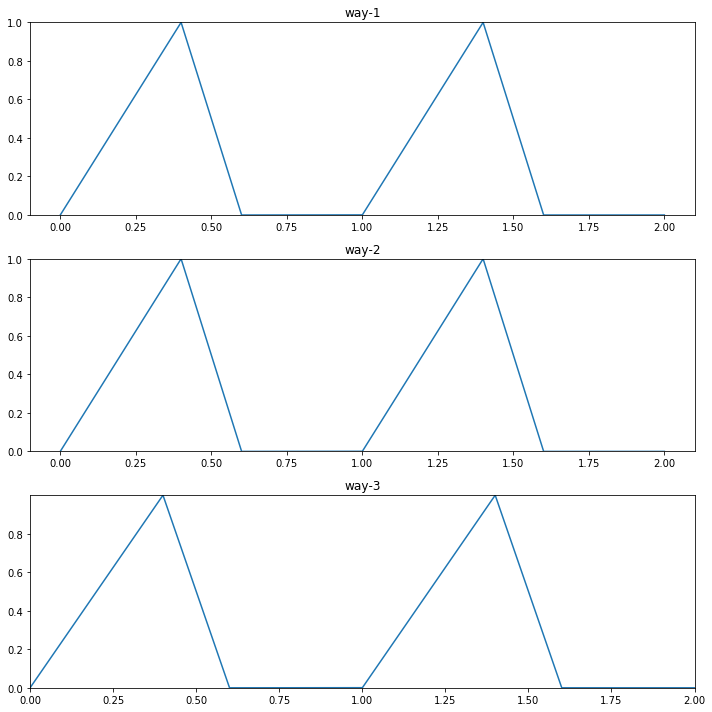

In [62]:
%matplotlib inline
# ==========================
#          画图
# ==========================
figsize(10, 10)
# 图1
ax = plt.subplot(311)
ax.set_autoscaley_on(False)
plt.plot(x,y1)

plt.title("way-1")

# 图2
ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.plot(x,y2)

plt.title("way-2")
# 图3
ax = plt.subplot(313)
ax.set_autoscaley_on(False)
plt.title("way-3")

plt.plot(x,y3)


plt.autoscale(tight=True)
plt.tight_layout()


## 广播

当我们使用`ufunc函数`对两个数组进行计算时，`ufunc函数`会对这两个数组的对应元素进行计算，因此它要求这**两个数组有相同的大小**(`shape相同`)。如果两个数组的`shape`不同的话，会进行如下的**广播**(`broadcasting`)处理：

1. 让所有输入数组都向其中`shape`最长的数组看齐，`shape`中不足的部分都通过**在前面加1补齐**
2. 输出数组的`shape`是输入数组`shape`的各个轴上的**最大值**
3. 如果 **输入数组的某个轴** 和 **输出数组的对应轴** 的`长度相同` 或者`其长度为1` 时，这个数组能够用来计算，否则出错
4. 当 **输入数组的某个轴** 的`长度为1`时，沿着此轴运算时都用 **此轴上的第一组值**


In [281]:
# 产生0~60，间距为10的数组，行(第0轴)为-1则根据列自动匹配
a = np.arange(0, 60, 10).reshape(-1, 1)
print('a :\n', a)
print('a.shape : ', a.shape)

print('---------------------------------------------------------------------------')
b = np.arange(0, 5)
print('b       :', b)
print('b.shape : ', b.shape)

print('---------------------------------------------------------------------------')
c = a + b
print('c :\n', c)
print('c.shape : ', c.shape)

a :
 [[ 0]
 [10]
 [20]
 [30]
 [40]
 [50]]
a.shape :  (6, 1)
---------------------------------------------------------------------------
b       : [0 1 2 3 4]
b.shape :  (5,)
---------------------------------------------------------------------------
c :
 [[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]
 [50 51 52 53 54]]
c.shape :  (6, 5)


由于 `a 和 b` 的`shape长度`(也就是`ndim属性`)不同：
- 根据**规则1**，需要让`b的shape` 向 `a` 对齐，于是将`b的shape` 补齐为`(1,5)`。
- 两个输入数组的`shape`分别为`(6,1)`和`(1,5)`，根据 **规则2**，可知输出数组的`shape`为`(6,5)`。
- **规则3**，当`输入数组的某个轴的长度为1`时，沿着此轴运算时都用`此轴上的第一组值`。

---

由于这种广播计算很常用，因此`numpy`提供了一个快速产生如上面`a,b`数组的方法： **ogrid对象**：


`ogrid`是一个很有趣的对象，它像一个多维数组一样，用切片组元作为下标进行存取，返回的是一组可以用来广播计算的数组。其切片下标有两种形式：

- **开始值 : 结束值 : 步长**，和`np.arange(开始值, 结束值, 步长)`类似；
- **开始值 : 结束值 : 长度j**，当`第三个参数为虚数`时，它表示**返回的数组的长度**，和`np.linspace(开始值, 结束值, 长度)`类似：


**注意：ogrid不是函数！！！**

根据`Python`的语法，**只有在中括号中才能使用用冒号隔开的切片语法**，**如果ogrid是函数的话**，那么这些切片必须使用`slice函数`创建，这显然会增加代码的长度。

In [283]:
x,y = np.ogrid[0:5,0:5]        #开始值:结束值:步长
print('x :\n', x)
print('y :\n', y)
print()
print('x.shape : ', x.shape)
print('y.shape : ', y.shape)

x :
 [[0]
 [1]
 [2]
 [3]
 [4]]
y :
 [[0 1 2 3 4]]

x.shape :  (5, 1)
y.shape :  (1, 5)


## ufunc的方法

`ufunc函数`本身还有些方法，这些方法只对**两个输入一个输出**(如**加法**)的`ufunc函数`有效，其它的`ufunc对象`调用这些方法时会抛出`ValueError异常`。

### reduce方法

`reduce方法` 和 `Python的reduce函数`类似，语法为：

```python
<op>.reduce (array=, axis=0, dtype=None)
```
沿着`axis轴`对`array`进行操作，将`<op>运算符`插入到沿`axis轴`的所有子数组或者元素当中。

In [291]:
x1 = np.array( [1,2,3] )
y1 = np.add.reduce(x1)         # 1 + 2 + 3

print('x1 : ', x1)
print('y1 : ', y1)
print('---------------------------------------------------------------------------')


x2 = np.array([[1,2,3],[4,5,6]])
y2 = np.add.reduce(x2, axis=1)  #  1,4 + 2,5 + 3,6
y3 = np.add.reduce(x2, axis=0)  #  1,2,3 + 4,5,6
print('x2 :\n', x2)
print('y2 : ', y2)
print('y3 : ', y3)

x1 :  [1 2 3]
y1 :  6
---------------------------------------------------------------------------
x2 :
 [[1 2 3]
 [4 5 6]]
y2 :  [ 6 15]
y3 :  [5 7 9]


### accumulate 方法
`accumulate方法` 和 `reduce方法`类似，只是它**返回的数组** 和 **输入的数组** 的`shape`相同，保存所有的中间计算结果

In [295]:
y5 = np.add.accumulate(x1)         # 1 + 2 + 3
print('x1 : ', x1)
print('y5 : ', y5)
print('---------------------------------------------------------------------------')

y6 = np.add.accumulate(x2, axis=1)  #  1,4 + 2,5 + 3,6
y7 = np.add.accumulate(x2, axis=0)  #  1,2,3 + 4,5,6
print('x2 :\n', x2)
print('y6 :\n', y6)
print('y7 :\n', y7)

x1 :  [1 2 3]
y5 :  [1 3 6]
---------------------------------------------------------------------------
x2 :
 [[1 2 3]
 [4 5 6]]
y6 :
 [[ 1  3  6]
 [ 4  9 15]]
y7 :
 [[1 2 3]
 [5 7 9]]


### reduceat方法
`reduceat方法`计算多组`reduce`的结果，通过`indices参数`指定一系列`reduce`的起始和终了位置。

In [298]:
a      = np.array([1,2,3,4])
result = np.add.reduceat(a, indices=[0,1,0,2,0,3,0])
print('a      : ',a)
print('result : ',result)


    

a      :  [1 2 3 4]
result :  [ 1  2  3  3  6  4 10]


结果数组`result`中除了最后一个元素之外，都按照如下的公式计算得出：
```python
if indices[i] < indices[i+1]:
    result[i] = <op>.reduce(a[ indices[i]:indices[i+1] ])
else:
    result[i] = a[ indices[i] ]
```
而最后一个元素如下计算：
```python
<op>.reduce( a[indices[-1]:] )
```

所以`result`中的元素计算如下：

```
1  : a[0] -> 1
2  : a[1] -> 2
3  : a[0] + a[1] -> 1 + 2 = 3
3  : a[2] -> 3
6  : a[0] + a[1] + a[2] -> 1 + 2 + 3 = 6
4  : a[3] -> 4
10 : a[0] + a[1] + a[2] + a[3] -> 1 + 2 + 3 + 4 = 10
```

### outer方法
outer方法，`<op>.outer(a,b)`方法的计算等同于如下程序


`*` | 10  | 20  | 30
:-: | :-: | :-: | :-: 
1   | 10  | 20  | 30
2   | 20  | 40  | 60   
3   | 30  | 60  | 90
4   | 40  | 80  | 120

`+` | 10  | 20  | 30
:-: | :-: | :-: | :-: 
1   | 11  | 21  | 31
2   | 12  | 22  | 32   
3   | 13  | 23  | 33
4   | 14  | 24  | 34

In [304]:
a = np.array([1,2,3,4])
b = np.array([10,20,30])
y1 = np.multiply.outer(a,b)
y2 = np.add.outer(a,b)
print('a : ',a)
print('b : ',b)
print('y1 :\n',y1)
print('y2 :\n',y2)

a :  [1 2 3 4]
b :  [10 20 30]
y1 :
 [[ 10  20  30]
 [ 20  40  60]
 [ 30  60  90]
 [ 40  80 120]]
y2 :
 [[11 21 31]
 [12 22 32]
 [13 23 33]
 [14 24 34]]
